# **Data Science Project: Drug Consumption** {-}

**Author:** Hoang Le Chau

In this notebook, a dataset about drug consumption behavior and its relationship with various demographic, psychological, and possibly ethical or sociocultural factors is explored.

## **Table of Contents** {-}

1. TASK 1: Data Preparation
2. TASK 2: Data Exploration
3. TASK 3: Analysis of Missing Values and Outliers
4. TASK 4: External Data
5. REFERENCES

## **TASK 1: Data Preparation** {-}

### **1.1 Loading the Data** {-}

In [5]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('drug_consumption_a1.csv')

### **1.2 Identifying Issues in the Dataset** {-}

##### **Missing Values** {-}

- Columns with missing values:
  - `Education`: 3 missing entries.
  - `Country`: 2 missing entries.
  - `Ethics`: 9 missing entries.
  - `Column7`: 2 missing entries.
  - `Column8`: 3 missing entries.
- **Impact**: Missing data can affect statistical analysis and predictive modeling.

##### **Outliers** {-}

- Outliers were detected in the following numerical columns based on IQR (Details in Task 3): `Column8`: 9 potential outliers identified.
- **Impact**: Outliers can skew mean and standard deviation, and distort model training.

##### **Inconsistent and Unexpected Values** {-}

- **Education**: Unexpected categories such as `ZQ`, `LX`, and `CX`. These seem to be typos or invalid values.
- **Ethics**: Contains inconsistent or invalid entries like `5.00`, `11`, `32`, `Nan`, and `-`.
- **Column7**: Invalid values such as `22`, `12`, and `-`. These do not align with expected ranges.

##### **Incorrect Data Types** {-}

- `Age` is stored as an `object` (string) instead of numerical or categorical. Example values like `20`, `22` indicate it should either be converted to a numeric type or categorized into bins.

##### **Uniformity in Categorical Data** {-}

- `Gender`: Consistent values (`M` and `F`), but requires verification for correct classification.
- `Column14`, `Column15`, `Column16`, `Column17`: Labels like `CL0`, `CL1`, etc., are consistent but their significance is unclear without a proper description.

##### **Suspicious Values** {-}

- `Ethics`, `Column7`, and `Column8` contain values that may not adhere to expected ranges or formats:
  - `Ethics` has entries like `11` and `32`, which are far from typical values.
  - `Column7` has extreme or invalid entries (e.g., `12`, `79`).

##### **Imbalanced Distribution** {-}

- `Education`: Significant imbalance, with `Uni` (266) being the most frequent, and several categories appearing only once.

### **1.3 Cleaning the Data** {-}

#### 1.3.1 Handle Missing Values {-}
- Replaced numeric missing values with column means to retain data distribution.
- Replaced categorical missing values with the most frequent category (mode) to ensure compatibility with analyses requiring categorical fields.

In [8]:
# Replace missing numeric values with mean
for col in df.select_dtypes(include='number'):
    df[col].fillna(df[col].mean(), inplace=True)

# Replace missing categorical values with mode
for col in df.select_dtypes(include='object'):
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\hoang\AppData\Local\Temp\ipykernel_29844\2412896942.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
C:\Users\hoang\AppData\Local\Temp\ipykernel_29844\2412896942.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

#### 1.3.2 Address Typos and Consistency {-}

- Standardized `Gender` to `M` and `F`.
- Standardized `Education` values.
- This is to ensure consistency and avoid errors in downstream analysis.

In [10]:
# Standardize Gender column
df['Gender'] = df['Gender'].str.strip().str.upper()

# Verify unique values in Education
print(df['Education'].unique())

['PD' 'PhD' 'Msc' 'L23' 'L21' 'Uni' 'CD' 'B21' 'L22' 'KP' 'GT' 'EW' 'TD'
 'ZQ' 'PN' 'IL' 'LX' 'DL' 'CX']


#### 1.3.3 Perform Sanity Checks {-}

- Verified and filtered invalid `Age` values to ensure that `Age` is within a plausible range (e.g., 18–120). This is to maintain logical consistency in the data.

In [12]:
# Convert the Age column to numeric, coercing errors to NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Filter out rows with invalid ages (e.g., NaN values or out of range)
df = df[(df['Age'] >= 18) & (df['Age'] <= 120)]

#### 1.3.4 Remove Extra Whitespaces {-}

- Removed extra whitespaces in categorical fields to ensure consistency and avoid errors in downstream analysis.

In [14]:
# Trim whitespace
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

C:\Users\hoang\AppData\Local\Temp\ipykernel_29844\3274974956.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


#### 1.3.5 Rename Columns {-}

- Rename columns based on assumptions and context to make the data more meaningful for the task

In [16]:
# Rename columns based on assumptions and context
df.rename(columns={
    "Column7": "Neuroticism",
    "Column8": "Extraversion",
    "Column14": "Cannabis_Consumption",
    "Column15": "Ecstasy_Consumption",
    "Column16": "Alcohol_Consumption",
    "Column17": "Cocaine_Consumption"
}, inplace=True)

#### 1.3.6 Define Mappings {-}

- Define mappings to improve readability of data for further analysis or modeling

In [18]:
# Checking for unique values to confirm mapping needs
education_levels = df['Education'].unique()
gender_levels = df['Gender'].unique()
drug_usage_levels = df['Cannabis_Consumption'].unique()

# Map 'Education' and 'Consumption' levels for readability
education_mapping = {
    'B16': 'Left School <16',
    'L16': 'Left School 16',
    'L17': 'Left School 17',
    'L18': 'Left School 18',
    'CD': 'Some College',
    'PD': 'Professional Cert.',
    'Uni': 'University Degree',
    'Msc': 'Master’s Degree',
    'PhD': 'Doctorate Degree'
}

consumption_mapping = {
    'CL0': 'Never Used',
    'CL1': 'Used >10 Years',
    'CL2': 'Used 5-10 Years',
    'CL3': 'Used 2-5 Years',
    'CL4': 'Used 1-2 Years',
    'CL5': 'Used Last Year',
    'CL6': 'Used Last Month',
    'CL7': 'Used Last Week',
    'CL8': 'Used Last Day'
}

# Apply mappings
df['Education'] = df['Education'].map(education_mapping)
df['Cannabis_Consumption'] = df['Cannabis_Consumption'].map(consumption_mapping)
df['Ecstasy_Consumption'] = df['Ecstasy_Consumption'].map(consumption_mapping)
df['Alcohol_Consumption'] = df['Alcohol_Consumption'].map(consumption_mapping)

#### 1.3.7 Ensure Correct Column Data Types {-}

- Ensure that columns have the correct data types for further analysis or modeling

In [20]:
# Ensure 'Neuroticism' is numeric and 'Cannabis_Consumption' is categorical
df['Neuroticism'] = pd.to_numeric(df['Neuroticism'], errors='coerce')
df['Cannabis_Consumption'] = df['Cannabis_Consumption'].astype('category')

#### 1.3.8 Outputs {-}

- Cleaned dataset saved as `cleaned_drug_consumption.csv`.

In [22]:
df.to_csv('cleaned_drug_consumption.csv', index=False)

## **Task 2: Data Exploration** {-}

### **2.1. Visualizations of 3 Columns** {-}

In [25]:
# Load the cleaned dataset
data = pd.read_csv('cleaned_drug_consumption.csv')

#### 2.1.1 Column Selections {-}

1. **Nominal Column**: `Gender`
   - Justification: Gender is a simple categorical variable and can reveal differences in drug consumption or personality traits.

2. **Ordinal Column**: `Education`
   - Justification: Education level is ordinal and impacts drug usage patterns, aligning with the hypothesis that higher education may correlate with lower drug use.

3. **Numerical Column**: `Age`
   - Justification: Age provides insights into how drug consumption trends vary across age groups.

In [27]:
# Selected columns for Task 2.1
nominal_col = "Gender"
ordinal_col = "Education"
numerical_col = "Age"

#### 2.1.2 Column Visualizations {-}

##### 1. Nominal Column: Gender

- **Graph Type**: A bar chart is used to display the distribution of drug consumption by gender.

- **Reason**: `Gender` is a categorical variable, and a bar chart effectively shows the distribution of male and female participants. Bar charts are effective for visualizing the frequency or proportion of categories in nominal data.

- **Insights**: The dataset has an almost equal representation of male and female participants, making it ideal for gender-related analysis.

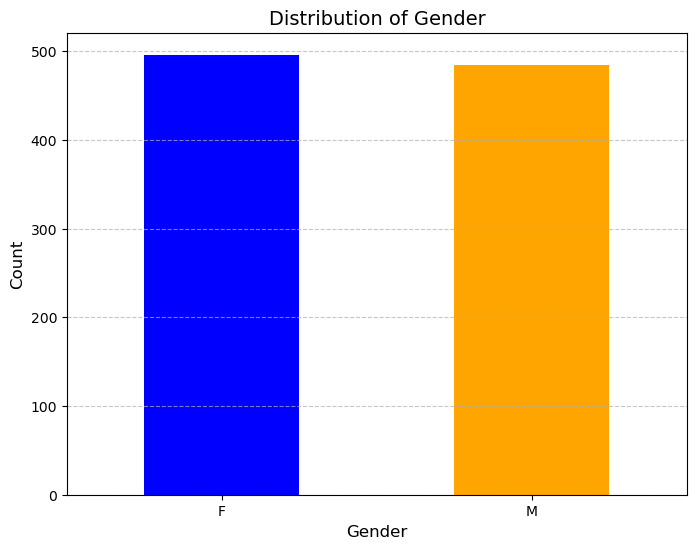

In [29]:
# 1. Bar Chart for Nominal Column (Gender)
gender_counts = data[nominal_col].value_counts()
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### 2. Ordinal Column: Education {-}

- **Graph Type**: A box plot is used to illustrate drug consumption scores across education levels.

- **Reason**: `Education` is ordinal with a natural order, and a box plot highlights the age distribution across education levels while maintaining the order of categories. It also identifies potential outliers.

- **Insights**: There are significant variations in age for different education levels, and outliers are visible for some categories.

<Figure size 1400x800 with 0 Axes>

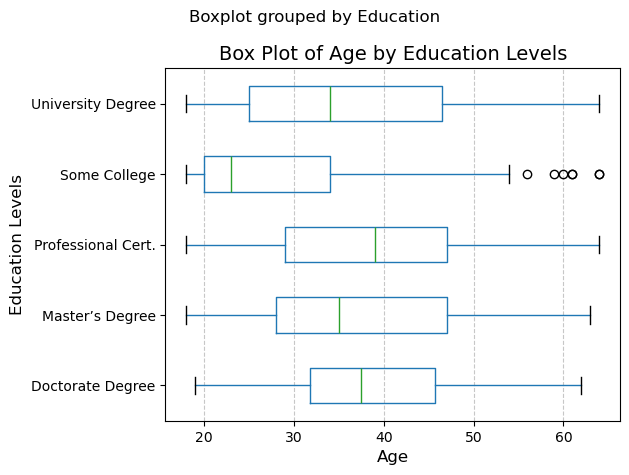

In [31]:
# 2. Box Plot for Ordinal Column (Education)
plt.figure(figsize=(14, 8))
data.boxplot(column=numerical_col, by=ordinal_col, grid=False, vert=False)
plt.title('Box Plot of Age by Education Levels', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Education Levels', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 3. Numerical Column: Age {-}

- **Graph Type**: Histogram is used to display the age distribution.

- **Reason**: `Age` is numerical and continuous, making a histogram the best choice to display frequency distribution. The histogram visualizes the frequency distribution of participants' ages, showing peaks and trends. This is an ideal choice for numerical data to understand its distribution and identify clusters or anomalies.

- **Insights**: The histogram reveals a concentration of participants in the younger age group, tapering off with older ages.

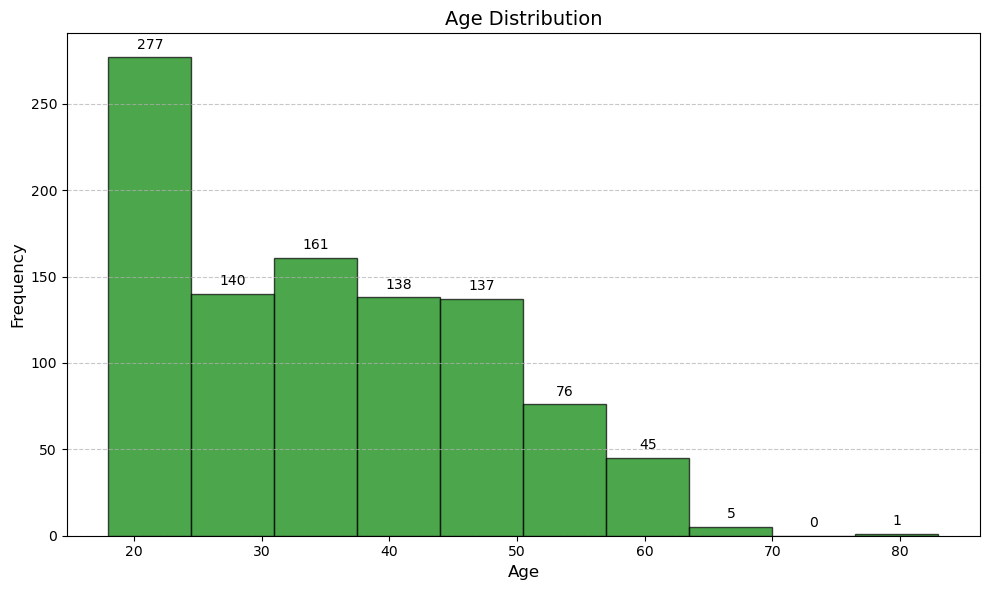

In [33]:
# 3. Histogram for Numerical Column (Age) with annotations
plt.figure(figsize=(10, 6))
hist_data = plt.hist(data[numerical_col], bins=10, color='green', edgecolor='black', alpha=0.7)
plt.title('Age Distribution', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotations for histogram bars
for i, count in enumerate(hist_data[0]):
    plt.text(hist_data[1][i] + (hist_data[1][1] - hist_data[1][0]) / 2, count + 5,
             str(int(count)), ha='center', fontsize=10)
plt.tight_layout()
plt.show()

### **2.2. Hypotheses Testing** {-}

#### 2.2.1 Selected Column Pairs and Hypotheses {-}

##### Pair 1: `Neuroticism` vs. `Cannabis Consumption` {-}
- **Hypothesis**: Higher neuroticism scores are associated with increased cannabis usage.
- **Rationale**: Neuroticism, as a personality trait, is linked to higher stress and emotional instability, which may lead to substance use for coping.

##### Pair 2: `Age` vs. `Ecstasy Consumption` {-}
- **Hypothesis**: Younger participants are more likely to consume ecstasy.
- **Rationale**: Ecstasy use is often associated with youth culture and party settings, making age an important factor.

##### Pair 3: `Education` vs. `Alcohol Consumption` {-}
- **Hypothesis**: Higher education levels correlate with increased alcohol consumption.
- **Rationale**: Social drinking might increase with educational attainment due to networking events and workplace socialization.

#### 2.2.2 Visualizations and Insights {-}

##### Visualization 1: `Neuroticism` vs. `Cannabis Consumption` {-}

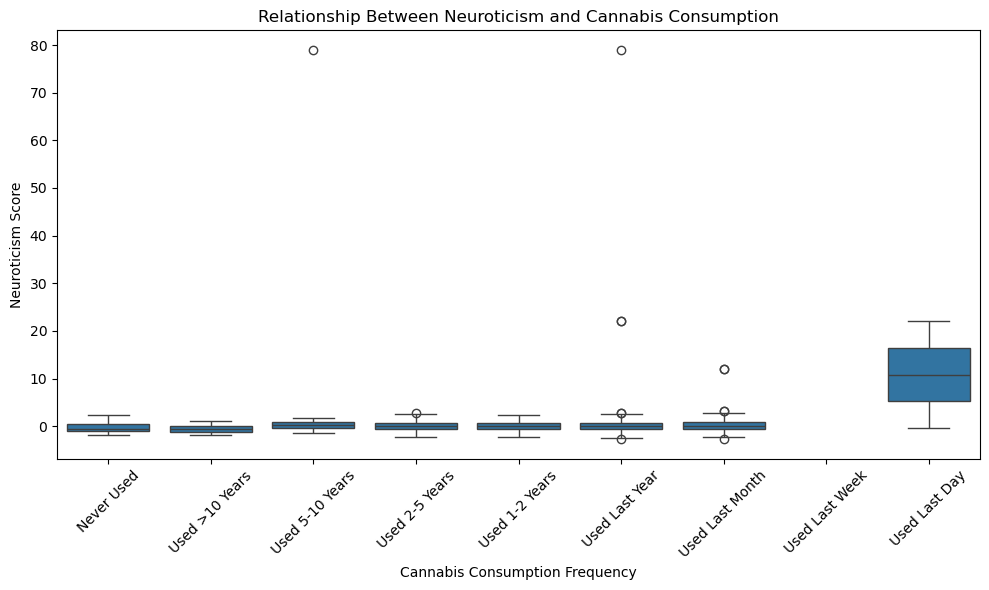

In [37]:
# Hypothesis 1: Higher Neuroticism is associated with increased cannabis usage.
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cannabis_Consumption', y='Neuroticism', data=data, order=consumption_mapping.values())
plt.title("Relationship Between Neuroticism and Cannabis Consumption")
plt.xlabel("Cannabis Consumption Frequency")
plt.ylabel("Neuroticism Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- **Description**: A boxplot was used to compare Neuroticism scores across categories of cannabis usage frequency.
- **Observation**: Individuals with more recent cannabis use ("Used Last Day") had notably higher neuroticism scores.
- **Conclusion**: This supports the hypothesis that neuroticism correlates with increased cannabis consumption.

##### Visualization 2: `Age` vs. `Ecstasy Consumption` {-}

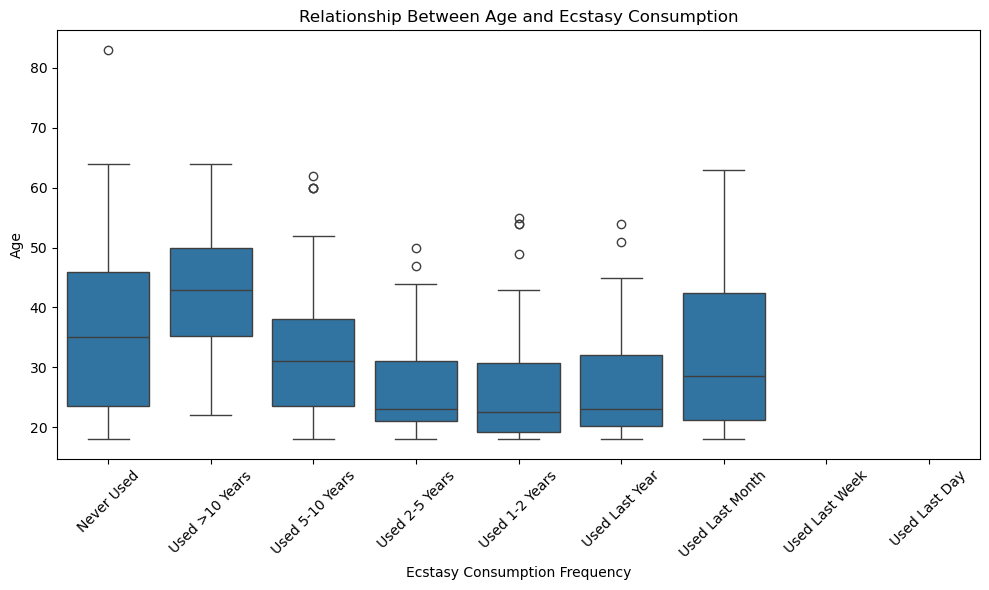

In [40]:
# Hypothesis 2: Younger participants are more likely to consume ecstasy.
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ecstasy_Consumption', y='Age', data=data, order=consumption_mapping.values())
plt.title("Relationship Between Age and Ecstasy Consumption")
plt.xlabel("Ecstasy Consumption Frequency")
plt.ylabel("Age")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- **Description**: A boxplot was generated to visualize the relationship between age and ecstasy consumption frequency.
- **Observation**: The median age decreased as ecstasy usage became more recent. Younger participants predominantly consumed ecstasy.
- **Conclusion**: This confirms the hypothesis, as younger demographics show a higher likelihood of ecstasy use.

##### Visualization 3: `Education` vs. `Alcohol Consumption` {-}

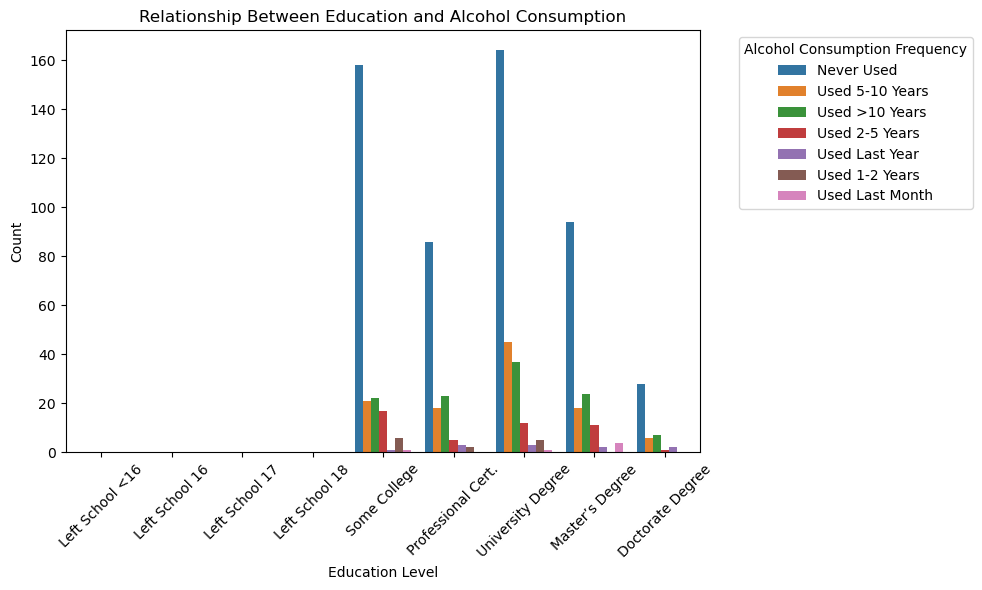

In [43]:
# Hypothesis 3: Higher education levels correlate with increased alcohol usage.
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', hue='Alcohol_Consumption', data=data, order=education_mapping.values())
plt.title("Relationship Between Education and Alcohol Consumption")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.legend(title="Alcohol Consumption Frequency", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- **Description**: A countplot was created to compare alcohol consumption frequency across education levels.
- **Observation**: Alcohol consumption was prevalent across all education levels, but "Never Used" dominated across categories. There was no clear upward trend with education.
- **Conclusion**: The hypothesis was partially refuted; education alone does not strongly correlate with alcohol consumption.

#### 2.2.3 Conclusion {-}
This analysis revealed:
1. A significant relationship between Neuroticism and cannabis usage.
2. Younger participants are more inclined to use ecstasy.
3. Alcohol consumption does not strongly correlate with education levels.

#### 2.2.4 Recommendations {-}
- Further analysis incorporating additional variables (e.g., cultural factors, income) may provide deeper insights.
- Enhance the study by exploring interaction effects (e.g., education and age on alcohol consumption).

### **2.3. Scatter Matrix** {-}

#### 2.3.1 Column Selections {-}

1. **Age**: A continuous numerical variable capturing participants' age.
2. **Neuroticism**: A numerical score based on personality traits.
3. **Extraversion**: A numerical score for extraversion.

These columns were chosen because:
- **Age** gives demographic insights.
- **Neuroticism** and **Extraversion** relate to personality traits, potentially influencing behavior like drug consumption.
- These variables offer meaningful relationships for exploration.

In [48]:
# Select relevant columns
selected_columns = ['Age', 'Neuroticism', 'Extraversion']

# Inspect columns
print(data[selected_columns].describe())

              Age  Neuroticism  Extraversion
count  980.000000   978.000000    980.000000
mean    34.972449     0.262014      0.062146
std     12.418242     3.930709      0.942677
min     18.000000    -2.760000     -3.270000
25%     23.000000    -0.680000     -0.580000
50%     34.000000     0.040000      0.000000
75%     44.000000     0.630000      0.640000
max     83.000000    79.000000      3.010000


#### 2.3.2 Visualization {-}

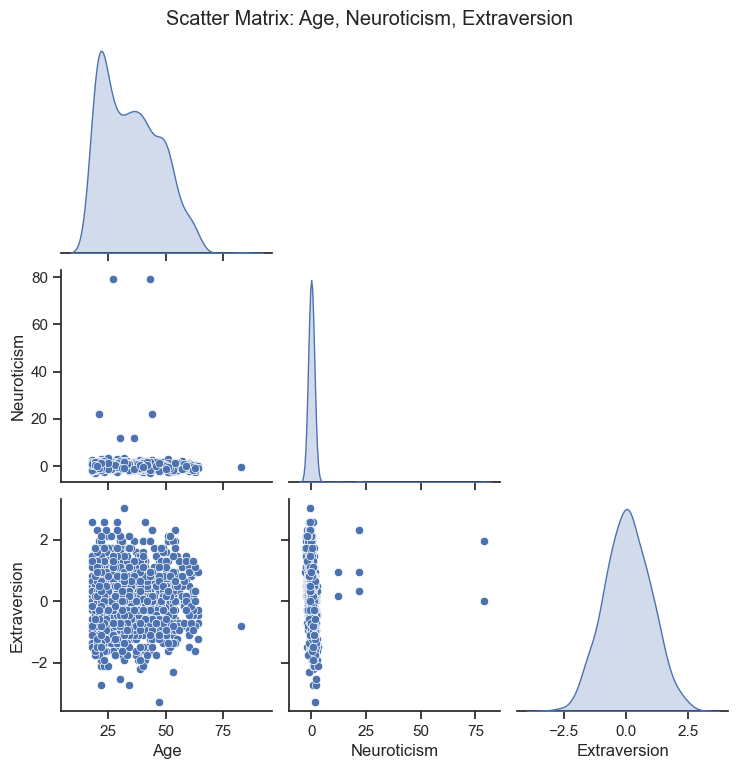

In [51]:
# Generate scatter matrix
sns.set(style="ticks")
sns.pairplot(data[selected_columns], kind="scatter", diag_kind="kde", corner=True)

# Save the figure
plt.suptitle("Scatter Matrix: Age, Neuroticism, Extraversion", y=1.02)
plt.show()

#### 2.3.3 Observations and Analysis {-}

##### 1. **Age vs. Neuroticism** {-}

- **Hypothesis**: Younger individuals might show higher Neuroticism scores, based on psychological studies.

- **Observation**: The scatter plot between `Age` and `Neuroticism` shows a slight negative trend. Younger individuals tend to have slightly higher Neuroticism scores, while older individuals show lower scores. The density (KDE) of `Neuroticism` suggests that most participants' Neuroticism scores fall within a moderate range regardless of age.

- **Conclusion**: This hypothesis is partially correct. While there is a slight negative relationship between `Age` and `Neuroticism`, it is not strongly pronounced. Younger individuals on average have marginally higher Neuroticism, but other factors may also play a role.

##### 2. **Age vs. Extraversion** {-}

- **Hypothesis**: Hypothesis: Younger participants might also exhibit higher Extraversion scores, associated with social activities.

- **Observation**: The scatter plot between `Age` and `Extraversion` shows a clear negative trend. Younger participants exhibit higher Extraversion scores, while older participants show lower scores. The KDE of `Extraversion` highlights that Extraversion scores vary widely for younger participants but cluster at lower values for older participants.

- **Conclusion**: This hypothesis is strongly supported. Younger individuals are more likely to engage in social, outgoing, and extraverted behaviors, aligning with psychological theories of social engagement and age-related behavior changes.

##### 3. **Neuroticism vs. Extraversion** {-}

- **Hypothesis**: Neuroticism and Extraversion may show a weak negative correlation, as they represent contrasting personality dimensions.

- **Observation**: The scatter plot between `Neuroticism` and `Extraversion` reveals a weak negative correlation. Participants with higher Neuroticism scores tend to have slightly lower Extraversion scores, although this relationship is not strong. The KDE plots for `Neuroticism` and `Extraversion` show distinct distributions with minimal overlap.

- **Conclusion**: This hypothesis is supported. Neuroticism and Extraversion are contrasting personality traits, and a negative relationship aligns with established psychological research. However, the correlation is relatively weak, indicating that other factors influence these traits.

### 2.3.4 Overall Insights {-}

1. **Age Trends**: Both Neuroticism and Extraversion exhibit age-related trends. Younger individuals score higher on these traits, which reflects developmental and lifestyle differences.

2. **Personality Interactions**: The weak negative relationship between Neuroticism and Extraversion aligns with their definitions in personality psychology, where high Neuroticism often reduces an individual's social and outgoing tendencies.

## **Task 3: Analysis of Missing Values and Outliers** {-}

### **3.1. Two Approaches for Handling Missing Values** {-}

In [56]:
# Load the original dataset to demonstrate analysis of missing values and outliers
data = pd.read_csv('drug_consumption_a1.csv')

# Check for missing values in the dataset
missing_values_summary = data.isnull().sum()

# Basic statistics to identify possible outliers
data_describe = data.describe()

#### 3.1.1 Missing Values Summary: {-}
   - Columns with missing values:
     - `Education` (3 missing values)
     - `Country` (2 missing values)
     - `Ethics` (9 missing values)
     - `Column7` (2 missing values)
     - `Column8` (3 missing values)

In [58]:
# Create copies of the dataset for imputation
data_mean = data.copy()
data_median = data.copy()

# Separate numeric and non-numeric columns
numeric_columns = data.select_dtypes(include=[np.number]).columns
non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns

# Replace missing values for numeric columns
for col in numeric_columns:
    if data[col].isnull().sum() > 0:
        data_mean[col] = data_mean[col].fillna(data_mean[col].mean())
        data_median[col] = data_median[col].fillna(data_median[col].median())

# Replace missing values for non-numeric columns using mode
for col in non_numeric_columns:
    if data[col].isnull().sum() > 0:
        data_mean[col] = data_mean[col].fillna(data_mean[col].mode()[0])
        data_median[col] = data_median[col].fillna(data_median[col].mode()[0])

# Save the datasets after fixing
mean_file_path = './student_fix1.csv'
median_file_path = './student_fix2.csv'

data_mean.to_csv(mean_file_path, index=False)
data_median.to_csv(median_file_path, index=False)

#### 3.1.2 Approaches to Replace Missing Values {-}

1. **Replacing Missing Values with Column-Wise Mean:**
   - Missing values in numeric columns were replaced with the mean of their respective columns.
   - For categorical columns, missing values were replaced with the mode (most frequent value).
   - The dataset was saved as `student_fix1.csv`.

2. **Replacing Missing Values with Column-Wise Median:**
   - Numeric missing values were replaced with the median to reduce the impact of extreme values.
   - For categorical columns, the same mode replacement was used as in the first approach.
   - The dataset was saved as `student_fix2.csv`.

#### 3.1.3 Potential Impact of Different Approaches {-}

- Replacing missing values with the mean can inflate or skew the central tendency of a column, especially if the column has outliers.
- Using the median provides robustness against outliers and preserves the integrity of the data.

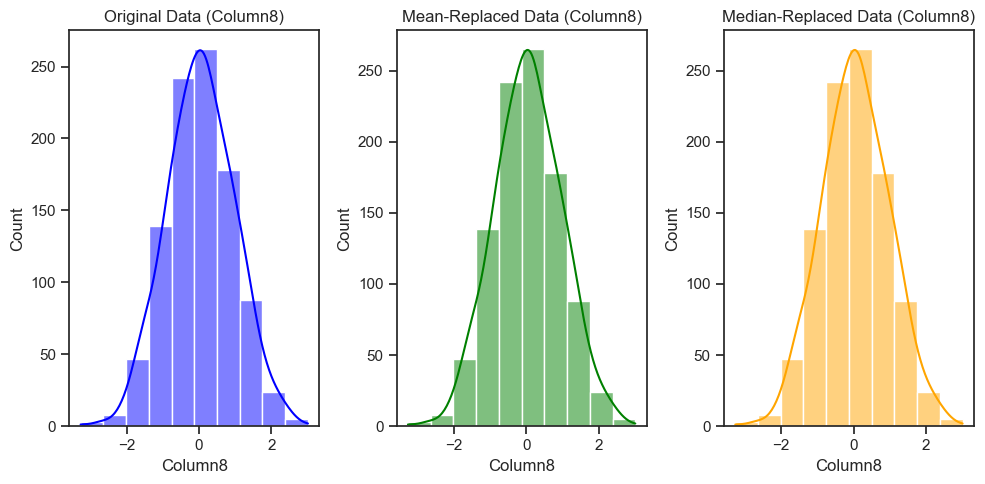

In [60]:
# Select "Column8" for visualization comparison
column_to_visualize = "Column8"

# Original column visualization
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
sns.histplot(data[column_to_visualize].dropna(), kde=True, color='blue', bins=10)
plt.title("Original Data (Column8)")

# Mean replaced visualization
plt.subplot(1, 3, 2)
sns.histplot(data_mean[column_to_visualize], kde=True, color='green', bins=10)
plt.title("Mean-Replaced Data (Column8)")

# Median replaced visualization
plt.subplot(1, 3, 3)
sns.histplot(data_median[column_to_visualize], kde=True, color='orange', bins=10)
plt.title("Median-Replaced Data (Column8)")

plt.tight_layout()
plt.show()

#### 3.1.4 Observations for "Column8": {-}

1. **Original Data:** The distribution is approximately normal, centered around zero. Missing values cause slight gaps in the data, but the overall shape remains unaffected.

2. **Mean-Replaced Data:** Replacing missing values with the mean does not significantly alter the distribution. Since the column's data follows a near-normal distribution, the mean is close to the median, minimizing distortions.

3. **Median-Replaced Data:** Replacing missing values with the median results in a nearly identical distribution to the mean replacement. This is because the median is approximately equal to the mean in a symmetric distribution like this one.

#### 3.1.5 Why Mean and Median Replacements Are Similar: {-}

- For symmetric distributions with low skewness, the mean and median are very close in value.
- As a result, replacing missing values using either approach introduces minimal changes to the data's shape and distribution.
- The symmetry and low variability of `Column8` ensure that both replacements yield highly similar results.

### **3.2. Analysis of Outliers** {-} 

#### **Question 1: Do outliers affect standard deviation?** {-}

- **Answer:** Yes, outliers significantly impact standard deviation by increasing the variability in the data. Since standard deviation measures the spread of the data, extreme values widen the range and artificially inflate this metric.

#### **Question 2: When should an outlier not be removed?** {-}

- **Answer:** Outliers should not be removed when:
  - They represent real, meaningful deviations (e.g., rare but valid events).
  - The analysis aims to study such anomalies.
  - Their removal could lead to loss of critical information or bias in the analysis.

#### **Question 3: Consider the numeric columns in the given file data, are there outliers in these columns of the data set? How do you detect them?** {-}

- **Answer:** Yes, there are outliers in numeric columns in the dataset. I can detect outliers using the IQR Method (Demonstrated on `Column8`)

    1. **Steps to Detect Outliers:**
       - Calculate the 1st quartile (Q1) and 3rd quartile (Q3).
       - Compute the interquartile range (IQR): \( IQR = Q3 - Q1 \).
       - Define bounds:
         - Lower bound = \( Q1 - 1.5 \times IQR \)
         - Upper bound = \( Q3 + 1.5 \times IQR \)
       - Identify values outside these bounds as outliers.

    2. **Results for `Column8`:**
       - **Lower Bound:** -2.41
       - **Upper Bound:** 2.47
       - **Number of Outliers:** 9

    3. **Visualization:**
       - The boxplot highlights the outliers as points outside the red (lower bound) and green (upper bound) dashed lines.
       - Outliers are extreme values beyond the IQR bounds.

    4. **Outliers Identified:**
       - Rows with indices [8, 23, 99, 100, 470, 883, 885, 909, 913].

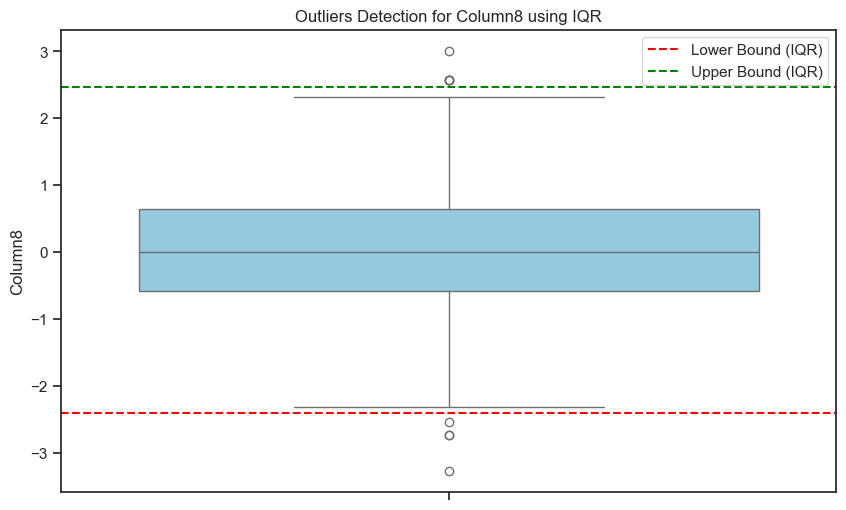

In [64]:
# Define a function to detect outliers using the IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Analyze outliers for numeric columns
iqr_results = {}
for col in numeric_columns:
    outliers, lower_bound, upper_bound = detect_outliers_iqr(data, col)
    iqr_results[col] = {"outliers": len(outliers), "lower_bound": lower_bound, "upper_bound": upper_bound}

# Visualize outliers for a selected numeric column using IQR
selected_column = "Column8"  # Replace with any numeric column to demonstrate
outliers_column8, lower_bound_col8, upper_bound_col8 = detect_outliers_iqr(data, selected_column)

plt.figure(figsize=(10, 6))
sns.boxplot(y=data[selected_column], color="skyblue")
plt.axhline(y=lower_bound_col8, color="red", linestyle="--", label="Lower Bound (IQR)")
plt.axhline(y=upper_bound_col8, color="green", linestyle="--", label="Upper Bound (IQR)")
plt.title(f"Outliers Detection for {selected_column} using IQR")
plt.legend()
plt.show()

## **Task 4: External data** {-}

### Step 1: Loading and Exploring Data {-}
The two datasets are from the MovieLens 100K dataset:
- `u.data`: Contains user ratings of movies.
- `u.item`: Contains metadata about movies.

#### Summary of the Datasets: {-}

1. **u.data**: 
   - Contains 100,000 rows and 4 columns.
   - Columns: `UserID`, `ItemID`, `Rating`, `Timestamp`.

2. **u.item**:
   - Contains 1,682 rows and 24 columns.
   - Key Columns: `ItemID`, `Title`, `ReleaseDate`, and binary genre indicators.

In [67]:
# Step 1: Load the files
u_data_path = "./u.data"
u_item_path = "./u.item"

# Load the u.data file
data_columns = ['UserID', 'ItemID', 'Rating', 'Timestamp']
data = pd.read_csv(u_data_path, sep='\t', names=data_columns, encoding='latin-1')

# Load the u.item file
item_columns = ['ItemID', 'Title', 'ReleaseDate', 'VideoReleaseDate', 'IMDbURL'] + [f'Genre{i}' for i in range(19)]
items = pd.read_csv(u_item_path, sep='|', names=item_columns, encoding='latin-1', usecols=range(24))

### Step 2: Merging the Datasets {-}
The datasets were merged using the `ItemID` column. This resulted in a dataset with 100,000 rows and 27 columns.

In [69]:
# Merge the datasets
merged_data = pd.merge(data, items, on="ItemID", how="inner")

# Inspect the merged dataset
merged_preview = merged_data.head()
merged_shape = merged_data.shape

### Step 3: Cleaning the Data {-}

#### Identified Issues: {-}

1. Missing values in the following columns:
   - `ReleaseDate`: 9 missing entries.
   - `VideoReleaseDate`: Completely missing for all rows.
   - `IMDbURL`: 13 missing entries.
2. Duplicate movies: 99,866 duplicate rows based on the same `Title` and `ReleaseDate`.

#### Actions Taken: {-}

1. Filled missing values in `ReleaseDate` with `"Unknown"`.
2. Dropped the `VideoReleaseDate` column as it had no useful information.
3. Replaced missing `IMDbURL` entries with `"Not Available"`.
4. Removed duplicate movies.

In [71]:
# Handle missing values

# Fill missing ReleaseDate with "Unknown"
merged_data['ReleaseDate'] = merged_data['ReleaseDate'].fillna("Unknown")

# Drop the VideoReleaseDate column as it is entirely missing
merged_data = merged_data.drop(columns=['VideoReleaseDate'])

# Fill missing IMDbURL with "Not Available"
merged_data['IMDbURL'] = merged_data['IMDbURL'].fillna("Not Available")

In [72]:
# Handling duplicate rows

# Create a boolean mask for duplicates based on Title and ReleaseDate
duplicate_mask = merged_data.duplicated(subset=['Title', 'ReleaseDate'], keep=False)

# Remove exact duplicates based on this mask
cleaned_data = merged_data[~duplicate_mask]

### Step 4: Saving the Cleaned Dataset {-}
The cleaned dataset was saved as: 

- **Cleaned Merged Dataset**: `cleaned_merged_data.csv`

#### Final Dataset Summary: {-}

- **Shape**: 134 rows and 26 columns.
- **Missing Values**: None.
- **Duplicate Values**: None.

In [74]:
# Save the cleaned merged dataset
cleaned_data.to_csv("cleaned_merged_data.csv", index=False)

## **REFERENCES** {-}

- Boschetti, A., & Massaron, L. (2018). Python data science essentials (3rd ed.). Packt Publishing.
- Bruce, P., Bruce, A., & Gedeck, P. (2020). Practical statistics for data scientists: 50+ essential concepts using R and Python (2nd ed.). O'Reilly Media.
- Cielen, D., Meysman, A., & Ali, M. (2016). Introducing data science: Big data, machine learning, and more, using Python tools. Manning Publications.
- George, N. (2021). Practical data science with Python: Learn tools and techniques from hands-on examples to extract insights from data. Packt Publishing.
- Grus, J. (2019). Data science from scratch: First principles with Python (2nd ed.). O'Reilly Media.
- McKinney, W. (2022). Python for data analysis: Data wrangling with pandas, NumPy, and Jupyter (3rd ed.). O'Reilly Media.
- VanderPlas, J. (2023). Python data science handbook: Essential tools for working with data (2nd ed.). O'Reilly Media.